The previous recipe dealt with the GO category enrichment of tags. However, we can do a similar analysis in terms of KEGG annotations. This recipe deals with the KEGG enrichment of data.

前面的教程处理了富集标记的GO类别。但是，我们可以根据KEGG注释进行类似的分析。这个教程处理的是KEGG数据的丰富。

1. Start with loading the required packages, goseq and edgeR, as follows:
 
 加载goseq和edgeR：

In [3]:
library(goseq)

In [4]:
library(edgeR)

Loading required package: limma


In [5]:
library(org.Hs.eg.db)

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from 'package:limma':

    plotMA

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, so

2. Load the data you will use for analysis from the goseq package as follows:
 
 从goseq包中加载需要分析的数据：

In [6]:
myData <- read.table(system.file("extdata", "Li_sum.txt",
package = 'goseq'), sep = '\t', header = TRUE, stringsAsFactors =
FALSE,row.names = 1)

Alternatively, you can read the data directly from the file provided with the code files on the book's web page as follows:
 
 也可以从文件中直接读取：

3. The first four columns in your data are controls and the last three are the treatment samples. Assign these attributes to the data and perform the differential tag computation as follows:

 前四个是对照组后三个是处理组样本。将这些属性分配给数据，并按如下方式执行差分标记计算：

In [7]:
myTreat <- factor(rep(c("Control","Treatment"),times = c(4,3)))

In [8]:
myData <- read.table(system.file("extdata", "Li_sum.txt", package="goseq"), sep = '\t', header = TRUE, stringsAsFactors = FALSE,row.names=1)
myDG <- DGEList(myData,lib.size = colSums(myData),group = myTreat)

In [9]:
myDisp <- estimateCommonDisp(myDG)

In [10]:
mytest <- exactTest(myDisp)

4. Use the genes from this analysis for enrichment, so extract the genes with the desired p-value and log fold change condition with their corresponding gene names, creating a named vector as follows:
 
 利用本次分析得到的基因进行富集，提取出所需的p值基因，并用相应的基因名进行对数倍变化条件，创建一个向量名如下：

In [11]:
myTags <- as.integer(p.adjust(mytest$table$PValue[mytest$table$logFC!=0], method = "BH") < 0.05)

In [12]:
names(myTags) <- row.names(mytest$table[mytest$table$logFC!=0,])

5. Now, compile your KEGG data for enrichment, starting with the conversion of ENSEMBL IDs to Entrez as follows:

 编译KEGG数据进行充实，首先将集成bl id转换为Entrez，如下所示：

In [13]:
en2eg <- as.list(org.Hs.egENSEMBL2EG)

6. Get all the KEGG IDs for the compiled Entrez IDs by typing the following command:

 获取编译后的Entrez id的所有KEGG id：

In [14]:
eg2kegg <- as.list(org.Hs.egPATH)

7. Now to get the KEGG and Entrez IDs mapped together, type the following commands:

 将KEGG和Entrez id映射到一起：

In [15]:
grepKEGG <- function(id,mapkeys){unique(unlist(mapkeys[id], use.names = FALSE))}

In [19]:
kegg <- lapply(en2eg,grepKEGG,eg2kegg)

8. To compute the probability weighting function, type the following command:

 计算概率加权函数：

Loading hg19 length data...
Warning message in pcls(G):
"initial point very close to some inequality constraints"

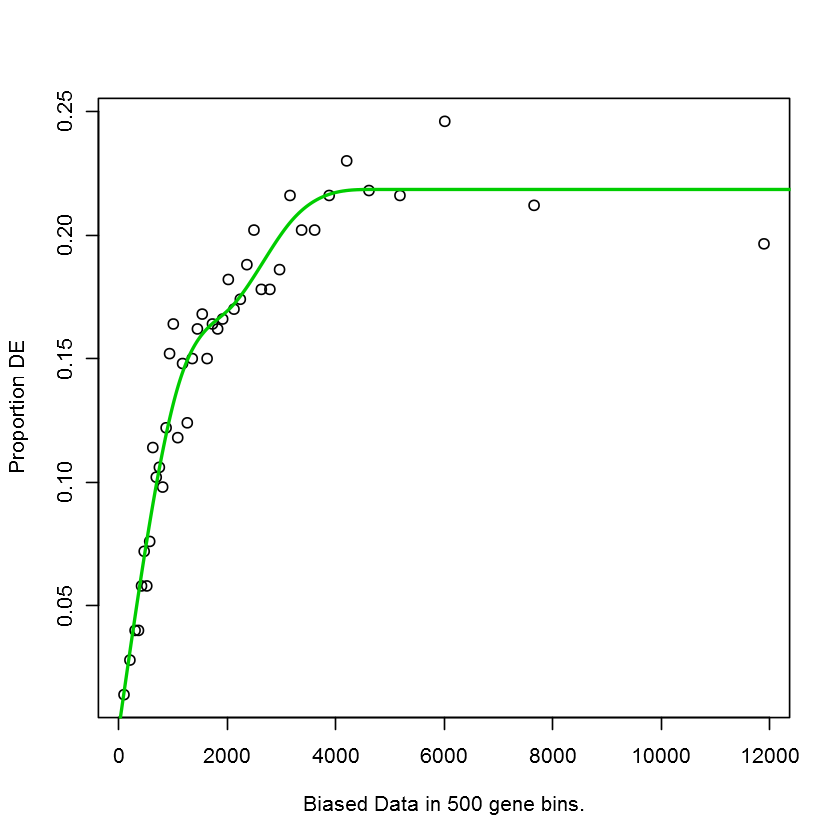

In [20]:
pwf <- nullp(myTags,"hg19","ensGene")

9. Use the goseq function with KEGG mappings for the enrichment of tags as follows:

  使用带有KEGG映射的goseq函数来丰富标记：

In [21]:
KEGG <- goseq(pwf,gene2cat = kegg)

Using manually entered categories.
For 18656 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...


In [22]:
head(KEGG)

,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat
88,03010,6.269088e-06,0.9999980,29,87
77,00900,2.383748e-04,0.9999711,10,15
113,04115,8.117298e-04,0.9996854,26,64
175,04964,2.144365e-03,0.9995939,10,17
27,00330,3.653372e-03,0.9986656,18,44
20,00250,5.182798e-03,0.9984416,13,28
